In [1]:
from FlowCytometryTools import FCMeasurement, ThresholdGate, PolyGate, IntervalGate
from os.path import join
from pylab import *
import pandas as pd
import numpy as np
import itertools

In [111]:
import altair as alt
from altair_saver import save as alt_save

In [112]:
alt.data_transformers.disable_max_rows(); # Allow using rows more than 5000

# Lung sample 2.1

In [2]:
# https://eyurtsev.github.io/FlowCytometryTools/API/FlowCytometryTools.FCMeasurement.html#FlowCytometryTools.FCMeasurement

In [3]:
sample_id = "lung_2_1"

In [4]:
fc_file = join("data", f"{sample_id}", "quantification", f"unmicst-{sample_id}.normalized.fcs")
sample = FCMeasurement(ID=sample_id, datafile=fc_file)

In [5]:
sample.get_data()

CellID  DAPI_1_cellMask  GFP.KP1.9_cellMask  CD206_cellMask  \
0        1.0     47306.914062        12115.922852    23801.083984   
1        2.0     41107.066406        11623.586914    18868.185547   
2        3.0     29977.369141        11301.370117    25425.283203   
3        4.0     30516.365234        10699.837891    14078.520508   
4        5.0     36792.695312        11144.007812    16551.902344   
...      ...              ...                 ...             ...   
3418  3419.0     12761.217773         7128.605469     5569.889160   
3419  3420.0     12761.217773         7128.605469     5569.889160   
3420  3421.0     12761.217773         7128.605469     5569.889160   
3421  3422.0     12761.217773         7128.605469     5569.889160   
3422  3423.0     12761.217773         7128.605469     5569.889160   

      BODIPY630.NP_cellMask  DAPI_2_cellMask  Arg1_cellMask  CD11c_cellMask  \
0              25772.349609     38931.945312      89.291664             0.0   
1              14906.456055     22326.882812       0.000000             0.0   
2              16448.822266     13183.925781       0.000000             0.0   
3              18577.412109     43164.128906       0.000000             0.0   
4              13955.623047     13454.811523       0.000000             0.0   
...                     ...              ...            ...             ...   
3418           10083.276367     20610.546875       0.000000             0.0   
3419           10083.276367     12515.377930       0.000000             0.0   
3420           10083.276367     29743.751953       0.000000             0.0   
3421           10083.276367     27729.441406       0.000000             0.0   
3422           10083.276367     18224.580078       0.000000             0.0   

      CD45_cellMask  DAPI_3_cellMask  ...  Y_centroid  column_centroid  \
0       5080.057129     25364.269531  ...   56.958332       487.458344   
1       7110.858398     15533.378906  ...   56.000000       457.000000   
2       5645.016602     22411.837891  ...   56.000000       481.000000   
3       5365.003418     17419.296875  ...   57.846153       412.000000   
4       5254.125488     36096.539062  ...   57.000000       483.000000   
...             ...              ...  ...         ...              ...   
3418       0.000000     12158.541016  ...  567.000000        56.000000   
3419       0.000000     12158.541016  ...  567.000000       101.000000   
3420       0.000000     12158.541016  ...  567.500000       105.000000   
3421       0.000000     12158.541016  ...  567.000000       136.000000   
3422       0.000000     12158.541016  ...  568.000000       113.000000   

      row_centroid  Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
0        56.958332  24.0         6.095588         4.978780      0.576943   
1        56.000000   1.0         0.000000         0.000000      0.000000   
2        56.000000   1.0         0.000000         0.000000      0.000000   
3        57.846153  13.0         5.203549         3.076923      0.806443   
4        57.000000   1.0         0.000000         0.000000      0.000000   
...            ...   ...              ...              ...           ...   
3418    567.000000   1.0         0.000000         0.000000      0.000000   
3419    567.000000   1.0         0.000000         0.000000      0.000000   
3420    567.500000   2.0         2.000000         0.000000      1.000000   
3421    567.000000   1.0         0.000000         0.000000      0.000000   
3422    568.000000   1.0         0.000000         0.000000      0.000000   

      Solidity    Extent  Orientation  
0         0.96  0.800000     1.256233  
1         1.00  1.000000     0.785398  
2         1.00  1.000000     0.785398  
3         1.00  0.866667     1.570796  
4         1.00  1.000000     0.785398  
...        ...       ...          ...  
3418      1.00  1.000000     0.785398  
3419      1.00  1.000000     0.785398  
3420      1.00  1.000000     0.000000  
3421      1.00  1.000000  

In [6]:
print(sample.channel_names)

('CellID', 'DAPI_1_cellMask', 'GFP.KP1.9_cellMask', 'CD206_cellMask', 'BODIPY630.NP_cellMask', 'DAPI_2_cellMask', 'Arg1_cellMask', 'CD11c_cellMask', 'CD45_cellMask', 'DAPI_3_cellMask', 'C12.D.nanoparticle_cellMask', 'X7C1.F5.nanoparticle_cellMask', 'G0.P5.nanoparticle_cellMask', 'X_centroid', 'Y_centroid', 'column_centroid', 'row_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation')


In [167]:
gfp_neg_gate = IntervalGate((0, 14000), "GFP.KP1.9_cellMask", 'in', name='GFP- Host')
gfp_pos_gate = IntervalGate((14000, 60000), "GFP.KP1.9_cellMask", 'in', name='GFP+ Tumor')

# Host (slide 1)
gfp_neg_cd45_neg_gate = IntervalGate((0, 6000), "CD45_cellMask", 'in', name='GFP- Host CD45-')
gfp_neg_cd45_pos_gate = IntervalGate((6000, 60000), "CD45_cellMask", 'in', name='GFP- Host CD45+')


gfp_neg_cd11c_neg_gate = IntervalGate((0, 3000), "CD11c_cellMask", 'in', name='GFP- Host CD11c-')
gfp_neg_cd11c_pos_gate = IntervalGate((3000, 60000), "CD11c_cellMask", 'in', name='GFP- Host CD11c+')

In [168]:
figure();

<Figure size 432x288 with 0 Axes>

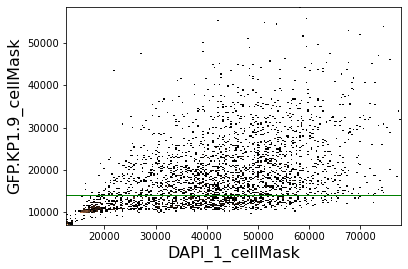

In [169]:
sample.plot(['DAPI_1_cellMask', 'GFP.KP1.9_cellMask'], gates=[gfp_neg_gate, gfp_pos_gate]);

In [176]:
def altair_sample_plot(sample, axes, gates, titles, title):
    df = sample.get_data()
    
    df = df.rename(
        columns=dict(zip(
            df.columns.values.tolist(),
            [col.replace(".", "_") for col in df.columns.values.tolist()]
        ))
    )
    
    plot = alt.Chart(df).mark_circle().encode(
        x=alt.X(f"{axes[0]}:Q", axis=alt.Axis(title=titles[0])),
        y=alt.Y(f"{axes[1]}:Q", axis=alt.Axis(title=titles[1]))
    ).properties(
        title=title
    )
    
    rule_x = alt.Chart(pd.DataFrame({'x': [gates[0].vert[1]]})).mark_rule().encode(x='x')
    rule_y = alt.Chart(pd.DataFrame({'y': [gates[1].vert[1]]})).mark_rule().encode(y='y')
    
    return plot + rule_x + rule_y

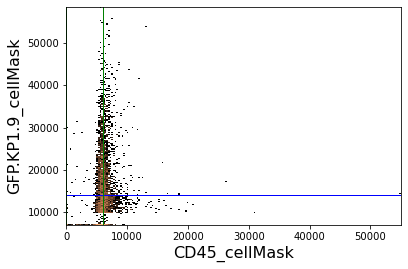

In [171]:
sample.plot(['CD45_cellMask', 'GFP.KP1.9_cellMask'], gates=[gfp_neg_gate, gfp_neg_cd45_neg_gate]);

In [179]:
altair_sample_plot(sample, ['CD45_cellMask', 'GFP_KP1_9_cellMask'], [gfp_neg_cd45_neg_gate, gfp_neg_gate], ["CD45", "GFP"], "")

alt.LayerChart(...)

In [173]:
altair_sample_plot(sample, ['CD11c_cellMask', 'GFP_KP1_9_cellMask'], [gfp_neg_cd11c_neg_gate, gfp_neg_gate], ["CD11c", "GFP"])

alt.LayerChart(...)

In [174]:
gfp_neg_cd45_pos_gate.vert

(6000, 60000)

In [136]:
gfp_pos_gated_sample = sample.gate(gfp_pos_gate)
gfp_neg_gated_sample = sample.gate(gfp_neg_gate)

In [87]:
gfp_neg_gated_sample.counts

1480

In [180]:
altair_sample_plot(gfp_neg_gated_sample, ['CD11c_cellMask', 'CD45_cellMask'], [gfp_neg_cd11c_neg_gate, gfp_neg_cd45_neg_gate], ["CD11c", "CD45"], "GFP-")

alt.LayerChart(...)

In [181]:
altair_sample_plot(gfp_pos_gated_sample, ['CD11c_cellMask', 'CD45_cellMask'], [gfp_neg_cd11c_neg_gate, gfp_neg_cd45_neg_gate], ["CD11c", "CD45"], "GFP+")

alt.LayerChart(...)

## GFP- Host

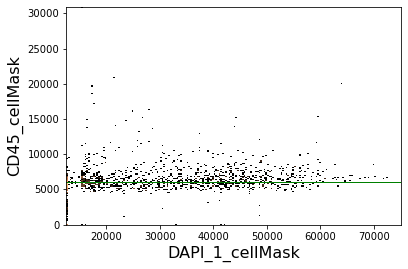

In [71]:
gfp_neg_gated_sample.plot(['DAPI_1_cellMask', 'CD45_cellMask'], gates=[gfp_neg_cd45_neg_gate, gfp_neg_cd45_pos_gate]);

In [72]:
gfp_neg_cd45_neg_gated_sample = gfp_neg_gated_sample.gate(gfp_neg_cd45_neg_gate)
gfp_neg_cd45_pos_gated_sample = gfp_neg_gated_sample.gate(gfp_neg_cd45_pos_gate)

In [73]:
gfp_neg_cd45_neg_gated_sample.counts

676

In [74]:
gfp_neg_cd45_pos_gated_sample.counts

804

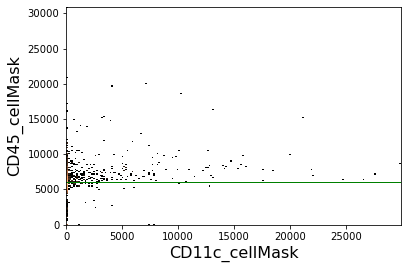

In [75]:
gfp_neg_gated_sample.plot(['CD11c_cellMask', 'CD45_cellMask'], gates=[gfp_neg_cd45_neg_gate, gfp_neg_cd45_pos_gate]);

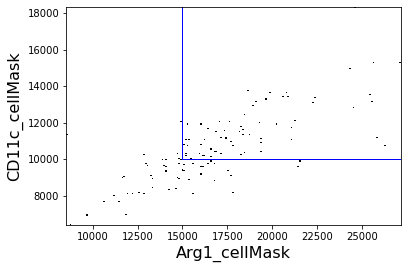

In [85]:
gfp_neg_cd45_pos_cd206_pos_gated_sample.plot(['Arg1_cellMask', 'CD11c_cellMask'], gates=[gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gate]);

In [86]:
gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gated_sample = gfp_neg_cd45_pos_cd206_pos_gated_sample.gate(gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gate)

In [87]:
gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gated_sample.counts

63

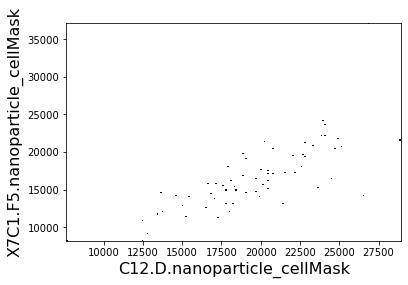

In [88]:
gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gated_sample.plot(['C12.D.nanoparticle_cellMask', 'X7C1.F5.nanoparticle_cellMask']);

## GFP+ Tumor

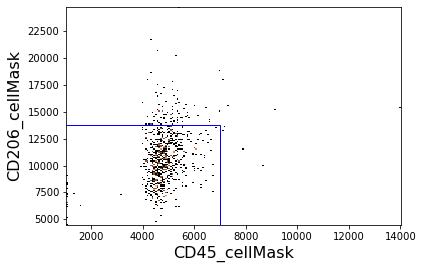

In [89]:
gfp_pos_gated_sample.plot(['CD45_cellMask', 'CD206_cellMask'], gates=[gfp_pos_cd45_neg_cd206_neg_gate]);

In [90]:
gfp_pos_cd45_neg_cd206_neg_gated_sample = gfp_pos_gated_sample.gate(gfp_pos_cd45_neg_cd206_neg_gate)

In [91]:
gfp_pos_cd45_neg_cd206_neg_gated_sample.counts

738

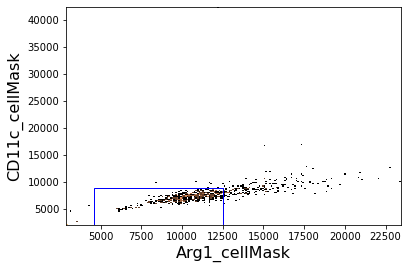

In [92]:
gfp_pos_cd45_neg_cd206_neg_gated_sample.plot(['Arg1_cellMask', 'CD11c_cellMask'], gates=[gfp_pos_cd45_neg_cd206_neg_cd11c_neg_arg1_neg_gate]);

In [93]:
gfp_pos_cd45_neg_cd206_neg_cd11c_neg_arg1_neg_gated_sample = gfp_pos_cd45_neg_cd206_neg_gated_sample.gate(gfp_pos_cd45_neg_cd206_neg_cd11c_neg_arg1_neg_gate)

In [30]:
gfp_pos_cd45_neg_cd206_neg_cd11c_neg_arg1_neg_gated_sample.counts

519

In [27]:
def classify_cells(sample, class_to_df):
    df = pd.DataFrame(index=sample.get_data().index.values.tolist(), columns=[], data=[])
    for cell_class_name, cell_class_sample in class_to_df.items():
        cells = cell_class_sample.get_data().index.values.tolist()
        df[cell_class_name] = df.index.to_series().apply(lambda i: i in cells)
    
    return df

In [28]:
df = classify_cells(sample, {
    "GFP-": gfp_neg_gated_sample,
    "GFP-/CD45+CD206+": gfp_neg_cd45_pos_cd206_pos_gated_sample,
    "GFP-/CD45+CD206+/CD11c+Arg1+": gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gated_sample,
    "GFP+": gfp_pos_gated_sample,
    "GFP+/CD45-CD206-": gfp_pos_cd45_neg_cd206_neg_gated_sample,
    "GFP+/CD45-CD206-/CD11c-Arg1-": gfp_pos_cd45_neg_cd206_neg_cd11c_neg_arg1_neg_gated_sample,
})

df.to_csv(join("data", sample_id, "flowcore", f"{sample_id}.classes.csv"), index=True)

In [29]:
writer = pd.ExcelWriter(join("data", sample_id, "flowcore", f"{sample_id}.classes.xlsx"))

for col in df.columns.values.tolist():
    sample.get_data().loc[df[col]].to_excel(writer, sheet_name=col.replace("/", " "))

writer.save()